In [11]:
##https://github.com/martindlarsson/blocket_scraper
import argparse
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import sqlite3
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

%matplotlib inline

PATH = "data.csv";
train_car_data = pd.read_csv(PATH)

In [27]:
train_car_data.head(5)


,brand,model,price,milage,hp,type,geo,model_year,gear_Automat,gear_Manuell,fuel_Bensin,fuel_Diesel,fuel_El,fuel_Miljöbränsle/Hybrid,model_code,brand_code
0,Saab,9-5,25000,30000.0,149.0,4,201,2006,0,1,0,1,0,0,569,50
1,Volvo,S80,85000,18000.0,163.0,6,77,2011,1,0,0,1,0,0,2153,59
2,Renault,CLIO,143900,140.0,89.0,3,59,2018,0,1,1,0,0,0,964,46
3,Volvo,V70,32500,20000.0,199.0,4,230,2001,1,0,1,0,0,0,2357,59
4,Peugeot,207,98900,10588.0,119.0,0,230,2010,1,0,1,0,0,0,117,43


In [13]:
train_car_data = train_car_data.drop("banana1", axis =1)
train_car_data = train_car_data.drop("banana", axis =1)


In [2]:
#droping extra/unneeded columns
train_car_data = train_car_data.drop('regnr', axis =1)
train_car_data = train_car_data.drop('id', axis =1)
train_car_data = train_car_data.drop('add_date', axis =1)
train_car_data = train_car_data.drop('make_year', axis =1)
train_car_data = train_car_data[train_car_data.brand != "Övriga"]
train_car_data = train_car_data.dropna(subset=['model', 'brand','price'])

KeyError: "['regnr'] not found in axis"

In [15]:
train_car_data.shape

(107305, 10)

In [16]:
train_car_data["geo"] = train_car_data["geo"].replace(np.nan,"Sweden", regex=True)
train_car_data["geo"] = train_car_data["geo"].replace("-","Sweden", regex=True)
train_car_data["type"] = train_car_data["type"].replace(np.nan,"Sedan", regex=True)
train_car_data["type"] = train_car_data["type"].replace("-","Sedan", regex=True)
train_car_data["gear"] = train_car_data["gear"].replace(np.nan,"Manuell", regex=True)
train_car_data["gear"] = train_car_data["gear"].replace("-","Manuell", regex=True)
train_car_data["fuel"] = train_car_data["fuel"].replace(np.nan,"Bensin", regex=True)
train_car_data["fuel"] = train_car_data["fuel"].replace("-","Bensin", regex=True)

 
train_car_data['milage'] = train_car_data['milage'].replace(" ", "", regex=True)
train_car_data['milage'] = train_car_data['milage'].apply(lambda x: x[5:] if "Merän" in x else (x if x.find("-") == -1 else x[:x.find("-")]))
train_car_data['milage'] = train_car_data['milage'].astype(float)

train_car_data["hp"] = train_car_data["hp"].replace("0",np.nan, regex=True)
train_car_data["hp"] = train_car_data["hp"].replace("-",np.nan, regex=True)
train_car_data['hp'] = train_car_data['hp'].astype(float)
#BRAND SHOULD BE CHANGE WITH MODEL(model) FOR BETTER ACCURECY FOR NOW THIS COUSE 5% WORST ACCURECY IN OUR MODEL
train_car_data["hp"]= train_car_data.groupby(["brand"])["hp"].transform(lambda x:x.fillna(x.median()))

In [ ]:
cols = {'price', 'brand', 'model', 'model_year', 'gear', 'fuel', 'milage', 'type', 'hp', 'geo'}

train_car_data.to_csv(path_or_buf=f"./Final.csv", sep=",", columns=cols)

In [17]:
train_car_data.head(5)

,brand,gear,model,price,fuel,milage,hp,type,geo,model_year
0,Saab,Manuell,9-5,25000,Diesel,30000.0,149.0,Kombi,Simrishamn,2006
1,Volvo,Automat,S80,85000,Diesel,18000.0,163.0,Sedan,Helsingborg,2011
2,Renault,Manuell,CLIO,143900,Bensin,140.0,89.0,Halvkombi,"Göteborg, Hisingen",2018
3,Volvo,Automat,V70,32500,Bensin,20000.0,199.0,Kombi,Sweden,2001
4,Peugeot,Automat,207,98900,Bensin,10588.0,119.0,Cab,Sweden,2010


In [ ]:
#train_car_data[450:500]

train_car_data[(train_car_data.brand.str.upper()  == "ROVER/BMC")].shape

In [9]:
train_car_data[(train_car_data.brand.str.upper()  == "ROVER/BMC")]

,Unnamed: 0,brand,gear,model,price,fuel,milage,hp,type,geo,model_year
7810,7820,Rover/BMC,Automat,"R75 2,0V6 C",21500,Bensin,16500.0,149.0,Sedan,Sweden,2001
12693,12711,Rover/BMC,Automat,"75 2,5",14000,Bensin,22000.0,176.0,Sedan,Gävle,2003
12981,13000,Rover/BMC,Manuell,"75 2,5",15900,Bensin,25000.0,176.0,Sedan,Landskrona,2003
14461,14481,Rover/BMC,Manuell,6230,17962,Bensin,18800.0,149.0,Halvkombi,Sweden,2003
17284,17312,Rover/BMC,Manuell,75 1.8T,22000,Bensin,9000.0,149.0,Sedan,Älmhult,2004
18425,18454,Rover/BMC,Manuell,STREETWISE,12900,Bensin,15000.0,149.0,Halvkombi,Sweden,2005
22487,22524,Rover/BMC,Manuell,STREETWISE,6000,Bensin,15000.0,149.0,Halvkombi,Vetlanda,2005
22792,22829,Rover/BMC,Automat,"75 1,8T",10000,Bensin,17500.0,149.0,Sedan,Landskrona,2004
24533,24576,Rover/BMC,Automat,ZT-T,34900,Bensin,16000.0,176.0,Kombi,Sweden,2005
31064,31124,Rover/BMC,Manuell,"75 1,8 T",5000,Bensin,26000.0,149.0,Sedan,"Malmö, Centralt Söder",2003


In [10]:
train_car_data['model'] = train_car_data['model'].apply(lambda x: "CITIGO" if "CITIGO" in x else
                                                                ("508" if "508" in x else 
                                                                ("530D" if "530D" in x else 
                                                                ("VECTRA" if "VECTRA" in x else 
                                                                ("BERLINGO" if "BERLINGO" in x else
                                                                ("UP" if "UP" in x else
                                                                ("626" if "626" in x else
                                                                ("HILUX" if "HILUX" in x else
                                                                ("S40" if "S40" in x else
                                                                ("107" if "107" in x else                                                                       
                                                                ("A3" if "A3" in x else 
                                                                ("TIGUAN" if "TIGUAN" in x else 
                                                                ("PAJERO" if "PAJERO" in x else
                                                                ("COOPER" if "COOPER" in x else
                                                                ("325I" if "325I" in x else
                                                                ("A5" if "A5" in x else
                                                                ("AVENSIS" if "AVENSIS" in x else                  
                                                                ("TOLEDO" if "TOLEDO" in x else 
                                                                ("TOUAREG" if "TOUAREG" in x else
                                                                ("520D" if "520D" in x else
                                                                ("KOMBI" if "KOMBI" in x else
                                                                ("MATIZ" if "MATIZ" in x else  
                                                                ("SWIFT" if "SWIFT" in x else                  
                                                                ("218D" if "218D" in x else 
                                                                ("PICASSO" if "PICASSO" in x else
                                                                ("C70" if "C70" in x else
                                                                ("323" if "323" in x else
                                                                ("I40" if "I40" in x else
                                                                ("GALAXY" if "GALAXY" in x else
                                                                ("ATOS" if "ATOS" in x else
                                                                ("ALTEA" if "ALTEA" in x else
                                                                ("PANDA" if "PANDA" in x else
                                                                ("AMAROK" if "AMAROK" in x else
                                                                ("C5" if "C5" in x else
                                                                ("X4" if "X4" in x else 
                                                                ("A1" if "A1" in x else
                                                                ("CX-9" if "CX-9" in x else
                                                                  x )))))))))))))))))))))))))))))))))))))

In [11]:
train_car_data.shape

(107305, 11)

In [12]:
train_car_data['model'] = train_car_data['model'].apply(lambda x: "9-5" if "9-5" in x else 
                                                                    ("S80" if "S80" in x else 
                                                                    ("CLIO" if "CLIO" in x else
                                                                    ("207" if "207" in x else
                                                                    ("I10" if "I10" in x else
                                                                    ("V40" if "V40" in x else
                                                                    ("MOVANO" if "MOVANO" in x else
                                                                    ("V50" if "V50" in x else
                                                                    ("9-3" if "9-3" in x else
                                                                    ("MONDEO" if "MONDEO" in x else
                                                                    ("VIVARO" if "VIVARO" in x else
                                                                    ("XC60" if "XC60" in x else
                                                                    ("FIESTA" if "FIESTA" in x else
                                                                    ("IBIZA" if "IBIZA" in x else
                                                                    ("SANTA FA" if "SANTA" in  x else
                                                                    ("OMEGA" if "OMEGA" in x else
                                                                    ("ASTRA" if "ASTRA" in x else
                                                                    ("C1" if "C1" in x else 
                                                                    ("308" if "308" in x else
                                                                    ("TOURING" if "TOURING" in x else
                                                                    ("PASSAT" if "PASSAT" in x else
                                                                    ("A4" if "A4" in x else
                                                                    ("LEON" if "LEON" in x else
                                                                    ("V60" if "V60" in x else
                                                                    ("FOCUS" if "FOCUS" in x else
                                                                    ("POLO" if "POLO" in x else
                                                                    ("CEED" if "CEED" in x else
                                                                    ("GOLF" if "GOLF" in x else 
                                                                    ("320" if "320" in x else
                                                                    #("3" if "3" in x else this is for mazda but it brakes others
                                                                    #("220" if "220" in x else this is for mercides is not handlet yet there are few in the database
                                                                    ("245" if "245" in x else 
                                                                    ("PICANTO" if "PICANTO" in x else
                                                                    ("CADDY" if "CADDY" in x else
                                                                    ("SHARAN" if "SHARAN" in x  else
                                                                    ("VOYAGER" if "VOYAGER" in x else
                                                                    ("147" if "147" in x else 
                                                                    ("V70" if "V70" in x else 
                                                                    ("COROLLA" if "COROLLA" in  x else 
                                                                    ("S5" if "S5" in  x else
                                                                    ("OCTAVIA" if "OCTAVIA" in x else
                                                                    ("CHEROKEE" if "CHEROKEE" in x else
                                                                    ("A6" if "A6" in x else 
                                                                    ("407" if "407" in  x else 
                                                                    ("H-1" if "H-1" in  x else 
                                                                    ("AURIS" if "AURIS" in x else
                                                                    ("R8" if "R8" in x else 
                                                                    ("FABIA" if "FABIA" in x else 
                                                                    ("TOURAN" if "TOURAN" in  x else 
                                                                    ("500" if "500" in x else 
                                                                    ("LAGUNA" if "LAGUNA" in  x else 
                                                                    ("250" if "250" in  x else 
                                                                    ("XC90" if "XC90" in x else 
                                                                    ("SORENTO" if "SORENTO" in x else
                                                                    ("C3" if "C3" in x else
                                                                    ("C4" if "C3" in x else
                                                                    ("307" if "307" in x else
                                                                    ("206" if "206" in x else
                                                                    ("MEGANE" if "MEGANE" in x else 
                                                                    ("Q5" if "Q5" in x else 
                                                                    ("IX35" if "IX35" in x else 
                                                                    ("KUGA" if "KUGA" in x else
                                                                    ("I30" if "I30" in x else 
                                                                    ("I30" if "I 30" in x else 
                                                                    ("AVANT" if "AVANT" in x else 
                                                                    ("316" if "316" in x else 
                                                                    ("TRANSPORTER" if "TRANSPORTER" in x else 
                                                                    ("XC70" if "XC70" in x else 
                                                                    ("PRIUS" if "PRIUS" in x else 
                                                                    ("CORSA" if "CORSA" in x else 
                                                                    ("PARTNER" if "PARTNER" in x else
                                                                    ("530I" if "530I" in x else
                                                                    ("QASHQAI" if "QASHQAI" in x else 
                                                                    ("BEETLE" if "BEETLE" in x else 
                                                                    ("LANCER" if "LANCER" in x else 
                                                                    ("S60" if "S60" in x else 
                                                                    ("OUTLANDER" if "OUTLANDER" in x else
                                                                    ("ELANTRA" if "ELANTRA" in x else 
                                                                    ("CARAVELLE" if "CARAVELLE" in x else
                                                                    ("STRADA" if "STRADA" in x else 
                                                                    ("X1" if "X1" in x else
                                                                    ("X5" if "X5" in x else
                                                                    ("X6" if "X6" in x else
                                                                    ("TRAFIC" if "TRAFIC" in x else 
                                                                    ("PATROL" if "PATROL" in x else
                                                                    ("OCTAVIA" if "OCT" in x else
                                                                    ("X3" if "X3" in x else 
                                                                    ("YETI" if "YETI" in x else 
                                                                    x))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))


In [13]:
#EXPERIMENTS
#train_car_data["geo"] = train_car_data["geo"].replace("-",np.nan, regex=True)
#train_car_data["type"] = train_car_data["type"].replace("-",np.nan, regex=True)
#train_car_data["gear"] = train_car_data["gear"].replace("-",np.nan, regex=True)
#train_car_data["fuel"] = train_car_data["fuel"].replace("-",np.nan, regex=True)
#train_car_data["hp"] = train_car_data["hp"].replace("0",np.nan, regex=True)
#train_car_data["hp"] = train_car_data["hp"].replace("-",np.nan, regex=True)
#train_car_data = train_car_data.dropna(axis =0)

In [18]:
#drop the outlier
train_car_data = train_car_data[(train_car_data.hp > 40)]
train_car_data = train_car_data[(train_car_data.price > 4000)]
train_car_data = train_car_data[(train_car_data.price < 5000000)]
train_car_data =  train_car_data[(train_car_data.milage < 300000)]
train_car_data = train_car_data[(train_car_data.hp < 800)]

In [19]:
train_car_data.shape

(106309, 10)

In [26]:
#perform onehotEncoding and LabelEncoding
train_car_data = pd.get_dummies(train_car_data, dummy_na = False, columns=['gear','fuel'] )
lb_make = LabelEncoder()
train_car_data["geo"] = lb_make.fit_transform(train_car_data["geo"])
train_car_data["type"] = lb_make.fit_transform(train_car_data["type"])
train_car_data["model_code"] = lb_make.fit_transform(train_car_data["model"])
train_car_data["brand_code"] = lb_make.fit_transform(train_car_data["brand"])

KeyError: "None of [Index(['gear', 'fuel'], dtype='object')] are in the [columns]"

In [21]:
# correlation of each numeric feature with target 'price_eur' feature
feature_corr = train_car_data.corr()
print(feature_corr['price'].sort_values(ascending=False))

price                       1.000000
hp                          0.563394
model_year                  0.553860
gear_Automat                0.429189
geo                         0.106973
fuel_Diesel                 0.079799
fuel_Miljöbränsle/Hybrid    0.056633
fuel_El                     0.052646
model_code                  0.025081
type                       -0.046611
fuel_Bensin                -0.108022
brand_code                 -0.154978
gear_Manuell               -0.429189
milage                     -0.518123
Name: price, dtype: float64


In [22]:
### Step 3: Transform and select features
    
train_data_features = train_car_data.drop('price', axis =1) # drop() creates a copy and does not affect original data
train_data_features = train_data_features.drop('brand', axis =1) # drop() creates a copy and does not affect original data
train_data_features = train_data_features.drop('model', axis =1) # drop() creates a copy and does not affect original data

train_data_target = train_car_data["price"].copy() 
train_data_target.columns = ['price']

print('Shape of features:', train_data_features.shape)
print('Shape of target:', train_data_target.shape)

missing_values_train = train_data_features.isnull().sum().sort_values(ascending= False)
missing_values_train.head(30)

Shape of features: (106309, 13)
Shape of target: (106309,)


brand_code                  0
model_code                  0
fuel_Miljöbränsle/Hybrid    0
fuel_El                     0
fuel_Diesel                 0
fuel_Bensin                 0
gear_Manuell                0
gear_Automat                0
model_year                  0
geo                         0
type                        0
hp                          0
milage                      0
dtype: int64

In [23]:
train_data_target = train_car_data["price"].copy()
train_data_target.columns = ['price']
print('Shape of target:', train_data_target.shape)
print("Skew (log transform):", train_data_target.skew())

Shape of target: (106309,)
Skew (log transform): 4.347757557657954


RMSE on Train set : 14004523934.25555
RMSE on Test  set : 12906377511.492271


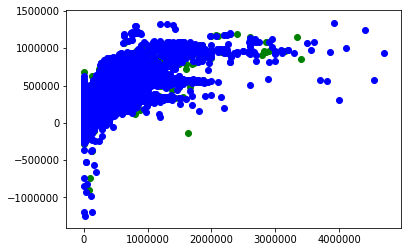

In [40]:
# Split dataset usuing `train_test_split()`
Xtrain, Xtest, ytrain, ytest = train_test_split(train_data_features, train_data_target, test_size=0.2, random_state=0)

# Train a simple linear regression model
lr = LinearRegression()
model= lr.fit(Xtrain, ytrain)
# Make predictions using the trained model on test set
ypredtest = model.predict(Xtest)
ypredtrain = model.predict(Xtrain)
# Evaluate model on test set using sklearn's metrics.mean_squared_error()
RSMEtest= metrics.mean_squared_error(ytest, ypredtest)

# Evaluate model on train set using sklearn's metrics.mean_squared_error()
RSMEtrain= metrics.mean_squared_error(ytrain, ypredtrain)

print("RMSE on Train set :", RSMEtrain)
print("RMSE on Test  set :", RSMEtest)
plt.show()

# Plotting linear model
plt.scatter(ytest, ypredtest, color='green')
plt.scatter(ytrain, ypredtrain, color='blue')

plt.show()

In [41]:
MAE_Linear_Test = metrics.mean_absolute_error(
    ytest, ypredtest, multioutput='uniform_average')
MAE_Linear_Train = metrics.mean_absolute_error(
    ytrain, ypredtrain, multioutput='uniform_average')

print("MAE on Train set for linear regression :", MAE_Linear_Train)
print("MAE on Test  set  for Linear regression :", MAE_Linear_Test)


# Second Metric
R2_Linear_Test = metrics.r2_score(ytest, ypredtest)*100
R2_Linear_Train = metrics.r2_score(ytrain, ypredtrain)*100

print("R2_score on Train set for linear regression :", R2_Linear_Train)
print("R2_score on Test  set  for Linear regression :", R2_Linear_Test)



MAE on Train set for linear regression : 64984.20931359425
MAE on Test  set  for Linear regression : 64772.00430419392
R2_score on Train set for linear regression : 63.96925586024752
R2_score on Test  set  for Linear regression : 65.48115983045666


RMSE on Train set : 14004523937.59498
RMSE on Test  set : 12906369382.14239


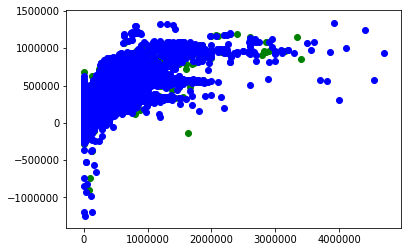

In [42]:
model = linear_model.Lasso(alpha=0.1)

Xtrain, Xtest, ytrain, ytest = train_test_split(train_data_features, train_data_target, test_size=0.2, random_state=0)

model.fit(Xtrain, ytrain)
# Make predictions using the trained model on test set
ypredtest = model.predict(Xtest)
ypredtrain = model.predict(Xtrain)
# Evaluate model on test set using sklearn's metrics.mean_squared_error()
RSMEtest= metrics.mean_squared_error(ytest, ypredtest)

# Evaluate model on train set using sklearn's metrics.mean_squared_error()
RSMEtrain= metrics.mean_squared_error(ytrain, ypredtrain)

print("RMSE on Train set :", RSMEtrain)
print("RMSE on Test  set :", RSMEtest)
plt.show()

# Plotting linear model
plt.scatter(ytest, ypredtest, color='green')
plt.scatter(ytrain, ypredtrain, color='blue')

plt.show()

In [43]:
MAE_Linear_Test = metrics.mean_absolute_error(
    ytest, ypredtest, multioutput='uniform_average')
MAE_Linear_Train = metrics.mean_absolute_error(
    ytrain, ypredtrain, multioutput='uniform_average')

print("MAE on Train set for linear regression :", MAE_Linear_Train)
print("MAE on Test  set  for Linear regression :", MAE_Linear_Test)


# Second Metric
R2_Linear_Test = metrics.r2_score(ytest, ypredtest)*100
R2_Linear_Train = metrics.r2_score(ytrain, ypredtrain)*100

print("R2_score on Train set for linear regression :", R2_Linear_Train)
print("R2_score on Test  set  for Linear regression :", R2_Linear_Test)



MAE on Train set for linear regression : 64984.23512857226
MAE on Test  set  for Linear regression : 64771.98711729468
R2_score on Train set for linear regression : 63.96925585165586
R2_score on Test  set  for Linear regression : 65.48118157286495


C:\Users\sakog\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on Train set : 709949986.0302957
RMSE on Test  set : 2324220980.486424


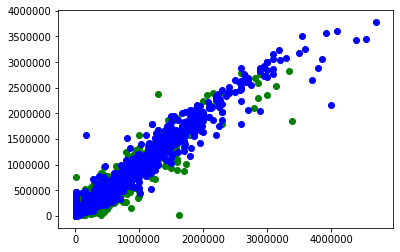

1.0
21262


In [24]:
model = RandomForestRegressor()
Xtrain, Xtest, ytrain, ytest = train_test_split(train_data_features, train_data_target, test_size=0.2, random_state=0)

model.fit(Xtrain, ytrain)
# Make predictions using the trained model on test set
ypredtest = model.predict(Xtest)
ypredtrain = model.predict(Xtrain)
# Evaluate model on test set using sklearn's metrics.mean_squared_error()
RSMEtest= metrics.mean_squared_error(ytest, ypredtest)

# Evaluate model on train set using sklearn's metrics.mean_squared_error()
RSMEtrain= metrics.mean_squared_error(ytrain, ypredtrain)

print("RMSE on Train set :", RSMEtrain)
print("RMSE on Test  set :", RSMEtest)
plt.show()

# Plotting linear model
plt.scatter(ytest, ypredtest, color='green')
plt.scatter(ytrain, ypredtrain, color='blue')

plt.show()

print(accuracy_score(ytest,ytest))
print(accuracy_score(ytest,ytest, normalize=False))

In [25]:
MAE_Linear_Test = metrics.mean_absolute_error(
    ytest, ypredtest, multioutput='uniform_average')
MAE_Linear_Train = metrics.mean_absolute_error(
    ytrain, ypredtrain, multioutput='uniform_average')

print("MAE on Train set for linear regression :", MAE_Linear_Train)
print("MAE on Test  set  for Linear regression :", MAE_Linear_Test)


# Second Metric
R2_Linear_Test = metrics.r2_score(ytest, ypredtest)*100
R2_Linear_Train = metrics.r2_score(ytrain, ypredtrain)*100

print("R2_score on Train set for linear regression :", R2_Linear_Train)
print("R2_score on Test  set  for Linear regression :", R2_Linear_Test)

MAE on Train set for linear regression : 10597.73791287268
MAE on Test  set  for Linear regression : 22642.976219110325
R2_score on Train set for linear regression : 98.1734454938444
R2_score on Test  set  for Linear regression : 93.78373889399477


NameError: name 'cols' is not defined